<a href="https://colab.research.google.com/github/gabivoiq/ep-plotting/blob/main/EP_Plotting_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EP - Data Manipulation & Advanced Plotting (pandas, seaborn & 3D Plotting)

In this lab, we will study data manipulation and visualization using **pandas**, and explore the high level API of **seaborn** for generating visually appealing plots. We will also take a look at 3D plotting using **mplot3d**. 

In [ ]:
# Some IPython magic
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Check out these cheetsheets for fast reference to the common libraries:

**Cheat sheets:**
- [python](https://perso.limsi.fr/pointal/_media/python:cours:mementopython3-english.pdf)
- [numpy](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
- [matplotlib](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
- [sklearn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)
- [pandas](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

**Other:**
- [Probabilities & Stats Refresher](https://stanford.edu/~shervine/teaching/cs-229/refresher-probabilities-statistics)
- [Algebra](https://stanford.edu/~shervine/teaching/cs-229/refresher-algebra-calculus)

## Pandas Crash Course

Pandas is a high-level data manipulation tool. It is built on the Numpy package and its key data structure is called the DataFrame. DataFrames allow you to store and manipulate tabular data in rows of observations and columns of variables.

Check this official guide for a started in pandas:

[10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

In [ ]:

import pandas as pd

Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. Pandas DataFrame consists of three principal components, the data, rows, and columns.

![](https://media.geeksforgeeks.org/wp-content/uploads/finallpandas.png)



Let's load a publicly available *.csv* dataset into a pandas ***DataFrame***. We will use the popular *iris* dataset.


In [ ]:
file_name = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"

df = pd.read_csv(file_name)
df.head(n = 10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


A dataframe's **.describe()** method offers descriptive statistics which include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,0.467571,1.198667,17.806533
std,0.828066,0.433594,0.299054,0.763161,3.368693
min,4.300000,2.000000,0.000000,0.100000,10.000000
25%,5.100000,2.800000,0.101695,0.300000,15.645000
50%,5.800000,3.000000,0.567797,1.300000,17.660000
75%,6.400000,3.300000,0.694915,1.800000,20.325000
max,7.900000,4.400000,1.000000,2.500000,30.020000


Let's see some ways in which we can access the DataFrames' data. Each column of a pandas `DataFrame` is a pandas `Series`.

In [ ]:
df['petal_width']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

We can do any vectorized operation on a `Series`. Moreover, a pandas `Series` allows us to do conditional selection of rows in a `DataFrame`.

In [ ]:
setosas = df[df['species'] == 'setosa']

setosas.head() # only setosa species selected

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area


We can add a new column to a pandas `DataFrame`, simply by specifying its name and its contents.

**NB**: the data added to the new column must be the same length as the rest of the `DataFrame`.

In [ ]:
df['sepal_area'] = df['sepal_length'] * df['sepal_width'] # adding new columns
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,0.067797,0.2,Setosa,17.85
1,4.9,3.0,0.067797,0.2,Setosa,14.70
2,4.7,3.2,0.050847,0.2,Setosa,15.04
3,4.6,3.1,0.084746,0.2,Setosa,14.26
4,5.0,3.6,0.067797,0.2,Setosa,18.00


We can work with `Series` as we work with numpy arrays. We perform Min-Max normalization on the `petal_length` column.

In [ ]:
# Min-Max Normalization
df['petal_length'] = (df['petal_length'] - df['petal_length'].min()) / (df['petal_length'].max() - df['petal_length'].min())
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,0.067797,0.2,Setosa
1,4.9,3.0,0.067797,0.2,Setosa
2,4.7,3.2,0.050847,0.2,Setosa
3,4.6,3.1,0.084746,0.2,Setosa
4,5.0,3.6,0.067797,0.2,Setosa


We can also use the `.apply()` method on either a `Series` or a `DataFrame` to modify its contents, or create a new column.

In [ ]:
def capitalize(col):
  return col.capitalize()

df['species'] = df['species'].apply(capitalize)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


A `DataFrame` also has a `groupby` method, that allows us to work on groupings of rows.

In [ ]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Setosa,5.006,3.418,1.464,0.244
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


We can also iterate through each group. A group is another `DataFrame`.

In [ ]:
for name, group in df.groupby('species'):
  print("Group:", name)
  print(group.head())
  print("-----")

Group: Setosa
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
-----
Group: Versicolor
    sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  Versicolor
51           6.4          3.2           4.5          1.5  Versicolor
52           6.9          3.1           4.9          1.5  Versicolor
53           5.5          2.3           4.0          1.3  Versicolor
54           6.5          2.8           4.6          1.5  Versicolor
-----
Group: Virginica
     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  Virginica
101

### Joins

Pandas allows for joining two or more `DataFrames` together using a common key. We can also do vertical or horizontal concatenation .

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1524477162/data-frames-in-python-banner_cgzjxy.png)

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'C': ['C0', 'C1', 'C2', 'C3'],
                     'D': ['D0', 'D1', 'D2', 'D3']})
df2 = pd.DataFrame({'A': ['A0', 'A1', 'A4', 'A5'],
                     'B': ['B4', 'B5', 'B6', 'B7'],
                     'C': ['C4', 'C5', 'C6', 'C7'],
                     'D': ['D4', 'D5', 'D6', 'D7']})
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                     'B': ['B8', 'B9', 'B10', 'B11'],
                     'C': ['C8', 'C9', 'C10', 'C11'],
                     'D': ['D8', 'D9', 'D10', 'D11']})

pd.concat([df1, df2, df3]).reset_index(drop = True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A0,B4,C4,D4
5,A1,B5,C5,D5
6,A4,B6,C6,D6
7,A5,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [ ]:
pd.merge(df1, df2, on = 'A', how = 'left')

,A,B_x,C_x,D_x,B_y,C_y,D_y
0,A0,B0,C0,D0,B4,C4,D4
1,A1,B1,C1,D1,B5,C5,D5
2,A2,B2,C2,D2,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN


## Saving `DataFrames`

Pandas offers a multitude of methods for saving `DataFrames`.

In [ ]:
df.to_csv('out.csv', index = False) # saves it locally, check out the files in the right tab of colab

In [ ]:
df.to_json()

'{"sepal_length":{"0":5.1,"1":4.9,"2":4.7,"3":4.6,"4":5.0,"5":5.4,"6":4.6,"7":5.0,"8":4.4,"9":4.9,"10":5.4,"11":4.8,"12":4.8,"13":4.3,"14":5.8,"15":5.7,"16":5.4,"17":5.1,"18":5.7,"19":5.1,"20":5.4,"21":5.1,"22":4.6,"23":5.1,"24":4.8,"25":5.0,"26":5.0,"27":5.2,"28":5.2,"29":4.7,"30":4.8,"31":5.4,"32":5.2,"33":5.5,"34":4.9,"35":5.0,"36":5.5,"37":4.9,"38":4.4,"39":5.1,"40":5.0,"41":4.5,"42":4.4,"43":5.0,"44":5.1,"45":4.8,"46":5.1,"47":4.6,"48":5.3,"49":5.0,"50":7.0,"51":6.4,"52":6.9,"53":5.5,"54":6.5,"55":5.7,"56":6.3,"57":4.9,"58":6.6,"59":5.2,"60":5.0,"61":5.9,"62":6.0,"63":6.1,"64":5.6,"65":6.7,"66":5.6,"67":5.8,"68":6.2,"69":5.6,"70":5.9,"71":6.1,"72":6.3,"73":6.1,"74":6.4,"75":6.6,"76":6.8,"77":6.7,"78":6.0,"79":5.7,"80":5.5,"81":5.5,"82":5.8,"83":6.0,"84":5.4,"85":6.0,"86":6.7,"87":6.3,"88":5.6,"89":5.5,"90":5.5,"91":6.1,"92":5.8,"93":5.0,"94":5.6,"95":5.7,"96":5.7,"97":6.2,"98":5.1,"99":5.7,"100":6.3,"101":5.8,"102":7.1,"103":6.3,"104":6.5,"105":7.6,"106":4.9,"107":7.3,"108":6.7,"1

In [ ]:
print(df.head().to_markdown())

|    |   sepal_length |   sepal_width |   petal_length |   petal_width | species   |
|---:|---------------:|--------------:|---------------:|--------------:|:----------|
|  0 |            5.1 |           3.5 |            1.4 |           0.2 | Setosa    |
|  1 |            4.9 |           3   |            1.4 |           0.2 | Setosa    |
|  2 |            4.7 |           3.2 |            1.3 |           0.2 | Setosa    |
|  3 |            4.6 |           3.1 |            1.5 |           0.2 | Setosa    |
|  4 |            5   |           3.6 |            1.4 |           0.2 | Setosa    |


In [ ]:
print(df.head().to_latex())

\begin{tabular}{lrrrrl}
\toprule
{} &  sepal\_length &  sepal\_width &  petal\_length &  petal\_width & species \\
\midrule
0 &           5.1 &          3.5 &           1.4 &          0.2 &  Setosa \\
1 &           4.9 &          3.0 &           1.4 &          0.2 &  Setosa \\
2 &           4.7 &          3.2 &           1.3 &          0.2 &  Setosa \\
3 &           4.6 &          3.1 &           1.5 &          0.2 &  Setosa \\
4 &           5.0 &          3.6 &           1.4 &          0.2 &  Setosa \\
\bottomrule
\end{tabular}



In [ ]:
print(df.head(n = 3).to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sepal_length</th>
      <th>sepal_width</th>
      <th>petal_length</th>
      <th>petal_width</th>
      <th>species</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>5.1</td>
      <td>3.5</td>
      <td>1.4</td>
      <td>0.2</td>
      <td>Setosa</td>
    </tr>
    <tr>
      <th>1</th>
      <td>4.9</td>
      <td>3.0</td>
      <td>1.4</td>
      <td>0.2</td>
      <td>Setosa</td>
    </tr>
    <tr>
      <th>2</th>
      <td>4.7</td>
      <td>3.2</td>
      <td>1.3</td>
      <td>0.2</td>
      <td>Setosa</td>
    </tr>
  </tbody>
</table>


In [ ]:
df.to_sql(name = '<table_name>', con = '<connection>') # insert into a sql database, works with a valid connection 
# check out https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_sql.html

ArgumentError: ignored

## Pandas Plotting

Pandas offers a convenient API for plotting data directly from a DataFrame. Of course, the plotting API is build upon `matplotlib` as a low level backend. We can use that to manipulate plots as in the previous lab.
Check out the official documentation for visualization:

[Pandas Plotting Docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization)


For a quick reference, check the official cookbook.

[Pandas Plotting Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook-plotting)

We will use the high level plotting API to visualize the Iris Dataset.

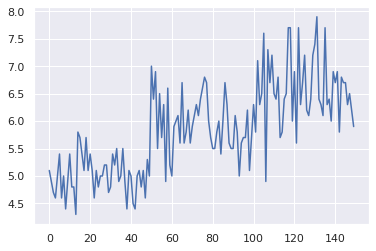

In [ ]:
df['sepal_length'].plot()

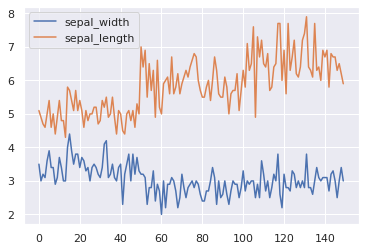

In [ ]:
df[['sepal_width', 'sepal_length']].plot()

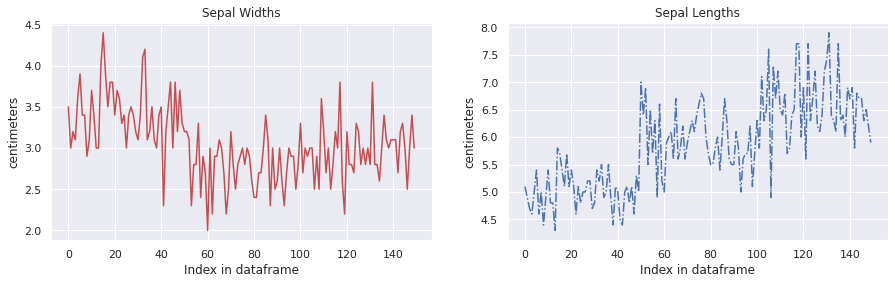

In [ ]:
fig, ax = plt.subplots(1, 2)

df['sepal_width'].plot(ax = ax[0], color = 'r')
df['sepal_length'].plot(ax = ax[1], linestyle = '-.')

ax[0].set_title('Sepal Widths')
ax[1].set_title('Sepal Lengths')

ax[0].set_xlabel('Index in dataframe')
ax[1].set_xlabel('Index in dataframe')

ax[0].set_ylabel('centimeters')
ax[1].set_ylabel('centimeters')


fig.set_size_inches(15, 4)

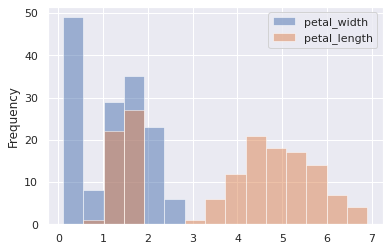

In [ ]:
df[['petal_width', 'petal_length']].plot.hist(alpha = 0.5, bins = 15)

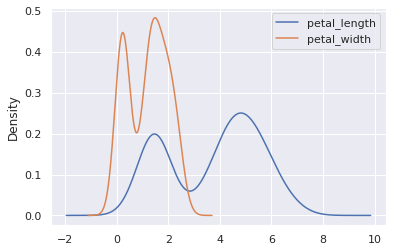

In [ ]:
df[['petal_length', 'petal_width']].plot.kde()

## Cool Plots using Seaborn & Pandas


Check out [seaborn](https://seaborn.pydata.org/examples/index.html) for more awesome plots.

In [ ]:
import seaborn as sns

sns.set_theme()

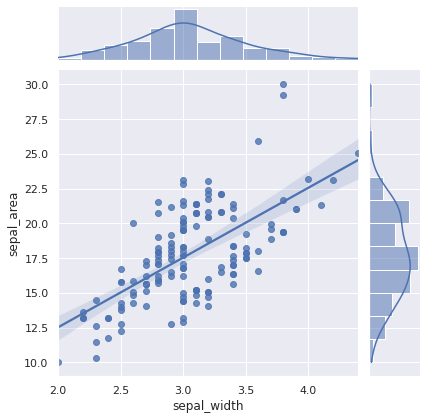

In [ ]:
sns.jointplot(x = 'sepal_width', y = 'sepal_area', data = df, kind = 'reg')

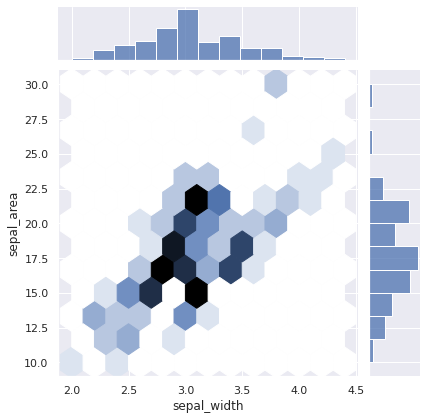

In [ ]:
sns.jointplot(x = 'sepal_width', y = 'sepal_area', data = df, kind = 'hex')

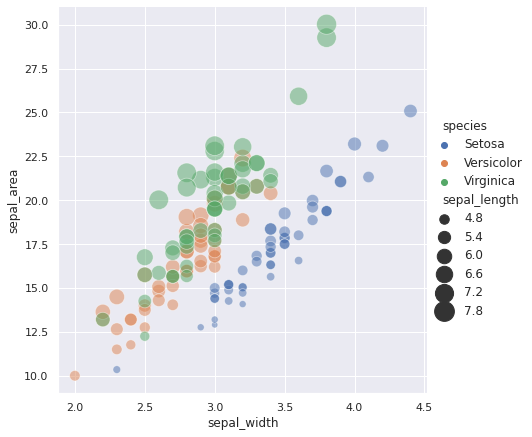

In [ ]:
sns.relplot(x="sepal_width", y="sepal_area", hue="species", size="sepal_length", sizes=(40, 400), alpha=.5, height=6, data=df)

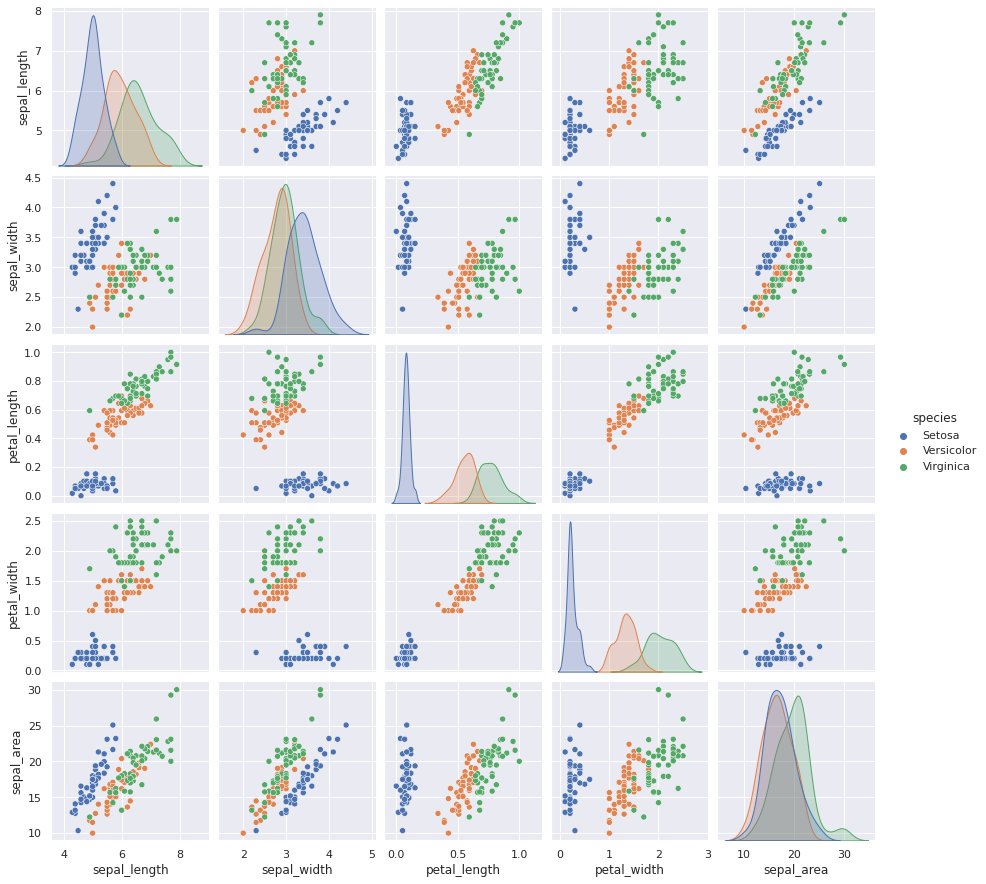

In [ ]:
grid = sns.pairplot(df, hue = 'species')

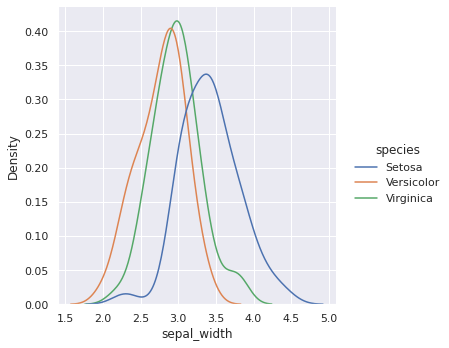

In [ ]:
sns.displot(data = df, x = 'sepal_width', kind = 'kde', hue = 'species')

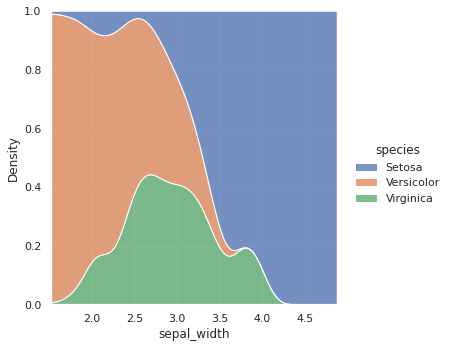

In [ ]:
sns.displot(data = df, x = 'sepal_width', kind = 'kde', hue = 'species', multiple = 'fill')

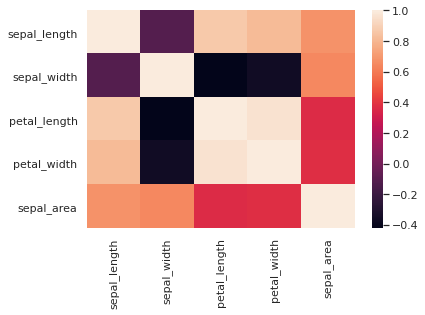

In [ ]:
sns.heatmap(df.corr())

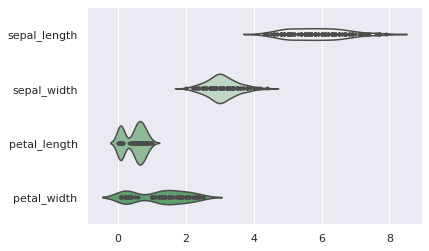

In [ ]:
sns.violinplot(data=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], palette="light:g", inner="points", orient="h")

## 3D Plotting

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


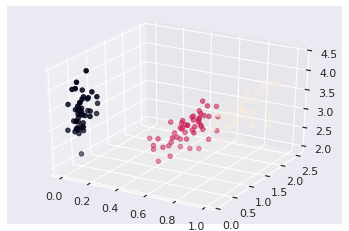

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['petal_length'], df['petal_width'], df['sepal_width'], zdir='z', s=20, c=df['species'].astype('category').cat.codes, depthshade=True)

# Exercises

After you finish your lab exercises, you should export this notebook as **pdf** and upload it to Moodle. (i.e. **File -> Print**, Destintation: Save as PDF).

In this lab, we will look at COVID data for Romania. The data was retrieved from https://graphs.ro/.

In [ ]:
import requests
import json

covid_data = json.loads(requests.get('https://www.graphs.ro/json.php').content)

covid_df = pd.DataFrame(covid_data['covid_romania'])
covid_df.head()

covid_county_data_dfs = []

for i, row in covid_df.iterrows():
  try: # some days have no county information
    county_df = pd.DataFrame(row['county_data'])
  except:
    continue

  county_df['reporting_date'] = row['reporting_date']
  covid_county_data_dfs.append(county_df)


county_df = pd.concat(covid_county_data_dfs)
covid_df = covid_df.drop(['sourceUrl', 'county_data'], axis = 1)

In [ ]:
covid_df.head()

,reporting_date,total_cases,new_cases_today,total_tests,new_tests_today,total_deaths,new_deaths_today,total_recovered,new_recovered_today,intensive_care_right_now,emergency_calls,information_calls,persons_in_quarantine,persons_in_home_isolation,tests_for_case_definition,tests_upon_request,tests_done_before_today_and_reported_today,infected_asymptomatic,infected_hospitalized,infected_positive_retests,persons_in_institutional_isolation,persons_in_home_quarantine,persons_in_institutional_quarantine,romania_population_2020
0,2020-11-29,471536,5554,4097782.0,16225.0,11193.0,148.0,348852.0,13088.0,1250.0,3652.0,NaN,NaN,48541.0,9877.0,6348.0,NaN,NaN,13200.0,787.0,11978.0,69194.0,68.0,19317984
1,2020-11-28,465982,8134,4081557.0,33021.0,11045.0,161.0,335764.0,9107.0,1249.0,4859.0,618.0,NaN,46389.0,20669.0,12352.0,NaN,NaN,13040.0,1298.0,11952.0,70150.0,62.0,19317984
2,2020-11-27,457848,8499,4048536.0,36649.0,10884.0,172.0,326657.0,3143.0,1226.0,4803.0,629.0,NaN,46856.0,23026.0,12584.0,1039.0,NaN,13157.0,1208.0,11916.0,69180.0,62.0,19317984
3,2020-11-26,449349,9005,4011887.0,36891.0,10712.0,171.0,323514.0,9629.0,1226.0,5095.0,716.0,NaN,48458.0,22829.0,13442.0,620.0,NaN,13248.0,1338.0,12376.0,70873.0,58.0,19317984
4,2020-11-25,440344,9739,3974996.0,35575.0,10541.0,168.0,313885.0,9697.0,1205.0,5223.0,713.0,NaN,43867.0,22524.0,13051.0,NaN,NaN,13402.0,1347.0,12561.0,68701.0,15.0,19317984


In [ ]:
county_df.head()

,county_id,county_name,county_population,total_cases,reporting_date
0,AB,Alba,323778,9881,2020-11-29
1,AR,Arad,415732,11191,2020-11-29
2,AG,Arges,574920,13565,2020-11-29
3,BC,Bacau,580912,12948,2020-11-29
4,BH,Bihor,559992,13938,2020-11-29


# 1. Basic Visualizations

Make 4 subplots. Using pandas as seaborn, plot the number of new cases in a day, the number of recovered patients in day, number of tests in a day, and the number of deaths in day. We are trying to explore the evolution of COVID from the start of the pandemic until today.

**NB:** Make sure to add proper labels, title, axes and legend where necessary.

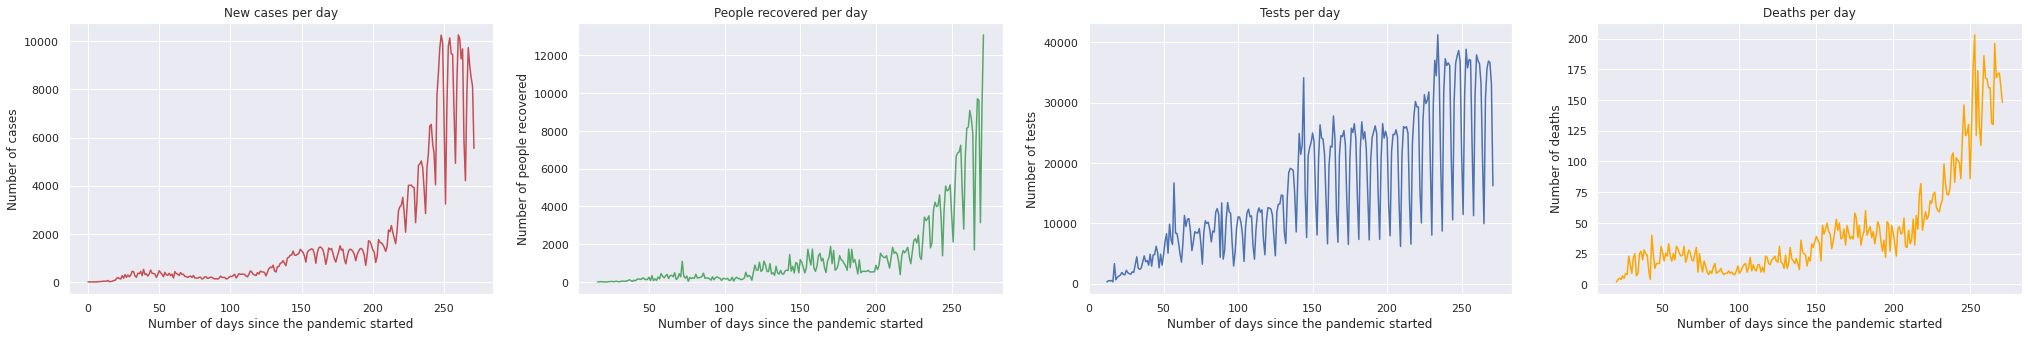

In [ ]:
# TODO your code here
covid_df = covid_df.sort_values('reporting_date', ignore_index=True)
fig, ax = plt.subplots(1, 4)
covid_df['new_cases_today'].plot(ax = ax[0], color = 'r', linestyle = '-')
covid_df['new_recovered_today'].plot(ax = ax[1], color = 'g', linestyle = '-')
covid_df['new_tests_today'].plot(ax = ax[2], color = 'b', linestyle = '-')
covid_df['new_deaths_today'].plot(ax = ax[3], color = 'orange', linestyle = '-')

ax[0].set_title('New cases per day')
ax[1].set_title('People recovered per day')
ax[2].set_title('Tests per day')
ax[3].set_title('Deaths per day')

for i in range(4):
  ax[i].set_xlabel('Number of days since the pandemic started')

ax[0].set_ylabel('Number of cases')
ax[1].set_ylabel('Number of people recovered')
ax[2].set_ylabel('Number of tests')
ax[3].set_ylabel('Number of deaths')

fig.set_size_inches(35, 5)

# 2. Positive testing percentage

Using `pandas`, create a new column that computes the percentage of positive tests in a given day. This new column should be the number of infected people in a day over the number of tests per day.

Plot the evolution of positive tests across time. Compare this to the number of hospitalized patients. 

In a different plot, visualize the correlation between positive tests and the number of intensive care patients.

**NB:** Make sure to add proper labels, title, axes and legend where necessary.


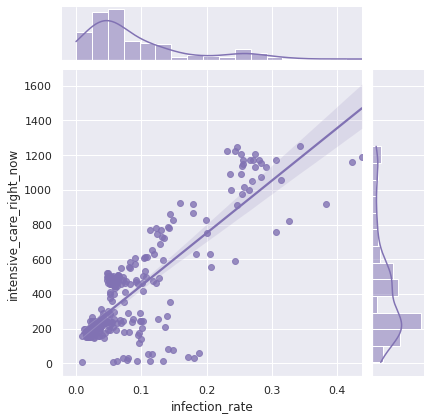

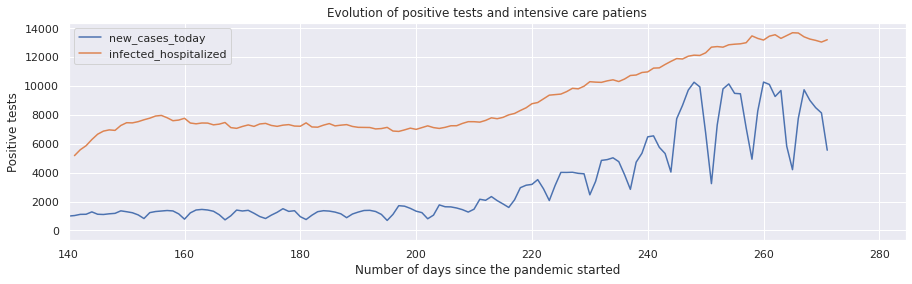

In [ ]:
# TODO your code here

covid_df['infection_rate'] = (covid_df['new_cases_today'] / covid_df['new_tests_today']).replace(np.nan, 0)

sns.set_theme(style='darkgrid')
sns.jointplot(x = 'infection_rate', y = 'intensive_care_right_now', data = covid_df, color ='m', kind = 'reg')

covid_df[['new_cases_today', 'infected_hospitalized']].plot()
plt.title('Evolution of positive tests and intensive care patiens')
plt.ylabel('Positive tests')
plt.xlabel('Number of days since the pandemic started')
plt.xlim(left = 140)
fig = plt.gcf()
fig.set_size_inches(15,4)





# 3. County Information

Select at least 10 counties of your choosing, and plot the evolution of cases across time. 

Plot the number of positive cases on 1000 persons for each of your selected counties. Plot a horizontal line at the 3 / 1000 mark. When the number of positive cases per 1000 persons exceeds 3 / 1000, color your points in a different color from that point onwards.


**NB:** Make sure to add proper labels, title, axes and legend where necessary.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

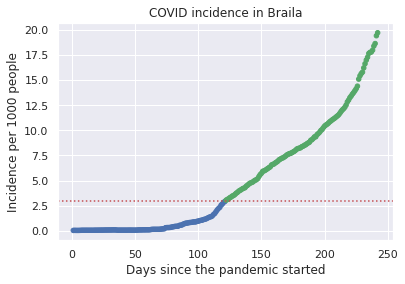

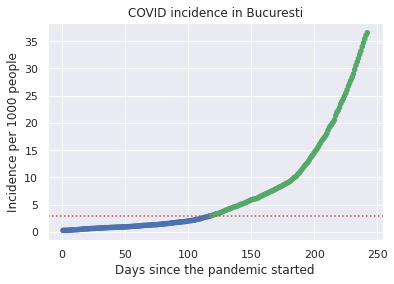

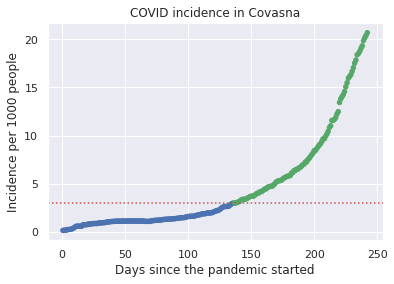

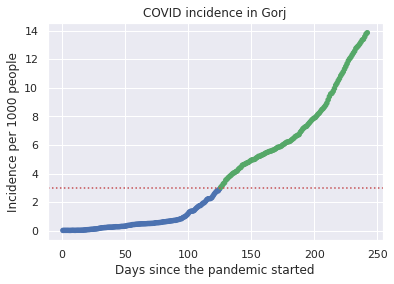

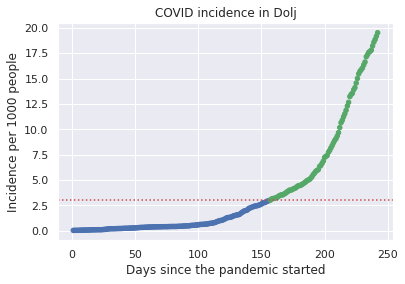

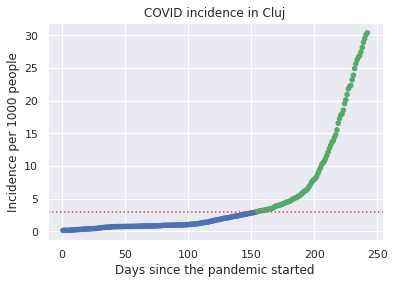

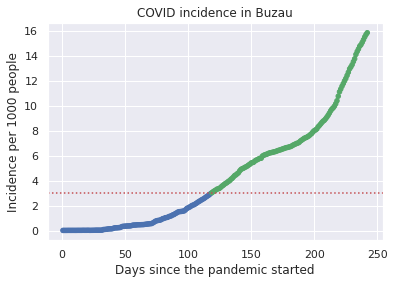

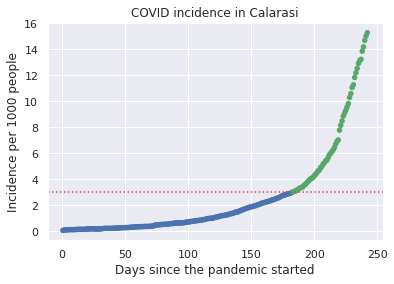

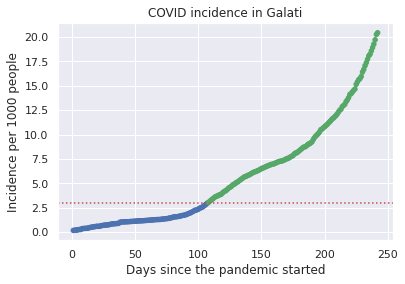

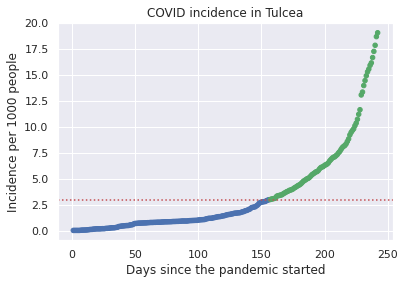

In [ ]:
counties = ['Braila', 'Bucuresti', 'Covasna', 'Gorj', 'Dolj', 'Cluj', 'Buzau', 'Calarasi', 'Galati', 'Tulcea']
county_df = county_df.sort_values('reporting_date')

county_data = county_df[county_df['county_name'].isin(counties)]
county_data['cases_per_1000'] = county_data['total_cases'] / (county_data['county_population'] / 1000)

for i in range(len(counties)):
  threshold = 3.0
  per_county = county_data[county_data['county_name'] == counties[i]]
  per_county['days'] = range(1, len(per_county) + 1)
  colors = np.where(per_county["cases_per_1000"] < 3,'b','g')

  plot_c = per_county.plot.scatter(x = 'days',
                                   y = 'cases_per_1000',
                                   c = colors)
  plot_c.set_title("COVID incidence in " + counties[i])
  plot_c.set_xlabel("Days since the pandemic started")
  plot_c.set_ylabel("Incidence per 1000 people")
  plot_c.axhline(threshold, color = 'r', linestyle = ':')



# BONUS

Further expore the dataset, and come up with interesting visualizations of the COVID evolution in Romania.

In [ ]:
# TODO your code here (maybe)

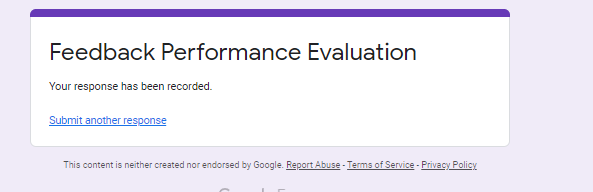